In [124]:
import pandas as pd
import numpy as np
import pickle
from datetime import timedelta

In [125]:
with open('second-pickle.pickle', 'rb') as f:
     df1,df2,df3 = pickle.load(f)

In [126]:
df1

['I-30 E',
 'I-35E S',
 'Warren Pkwy',
 'I-820 E',
 'Sutter St',
 'US-67 S',
 'I-20 W',
 'University Dr',
 'US-75 N',
 'Dallas North Tollway N',
 'FM 423',
 'Exit 29: President George Bush Tpk N',
 'I-35W N',
 'Exit 18: Oakland Blvd',
 'US-75 S',
 'SH-183 W',
 'I-635 W',
 'SH-360 S',
 'I-20 E',
 'to I-635 E',
 'N Henderson Ave',
 'I-35E N',
 'US-80 W',
 'US-287 S',
 'I-30 W',
 'Cimarron Trl',
 'Loop 12 S',
 'I-635 E',
 'Cupertino Trl',
 'W Northwest Hwy',
 'Elm St',
 'North Texas Blvd',
 'Eldorado Pkwy',
 'Circle Ln',
 'N Stemmons Fwy',
 nan,
 'Coit Rd',
 'Continental Ave',
 'I-35 N',
 'Meadowview Dr',
 'Sunrise Dr',
 'W Hebron Pkwy',
 'Young St',
 'Allen St',
 'Rendon New Hope Rd',
 'US-80 E',
 'W Lawther Dr',
 'Morton St',
 'Exit 54A: SH-183 / NE 28th St E',
 'W Rosedale St',
 'Willis Ave',
 'Lamar St',
 'Forest Park Blvd',
 'to Montfort Dr',
 'French Wood Dr',
 'E Trinity Mills Rd',
 'E Pioneer Pkwy',
 'to US-75 S',
 'SH-114',
 'to Oakmont Blvd',
 'Dowdy Ferry Rd',
 'E Belt Line Rd'

In [127]:
df3

,FACILITY_NAME,EVENT_TYPE,time
0,1000 Oaks Blvd,slowdown,2019-01-09 10:20:56
1,105th St,traffic jam,2018-11-22 19:52:47
2,105th St,heavy traffic,2018-11-28 17:06:55
3,105th St,heavy traffic,2018-11-28 17:07:27
4,105th St,traffic jam,2018-11-29 23:24:52
...,...,...,...
3057780,to Zang Blvd N,traffic heavier than normal,2018-12-06 07:50:24
3057781,to Zang Blvd N,heavy traffic,2018-12-14 16:48:31
3057782,to Zang Blvd N,heavy traffic,2019-01-24 07:53:18
3057783,to Zang Blvd N,heavy traffic,2019-01-31 07:46:35


In [128]:
len(df3[df3['EVENT_TYPE'].isin(['accident','minor accident'])])

49766

In [129]:
len(list(df3[(df3['EVENT_TYPE'].isin(["accident","minor accident"]))].FACILITY_NAME.unique()))

4131

In [130]:
sq=[]
for road in df1:
    temp_df=df3[df3['FACILITY_NAME'] == road]
    time=list(temp_df[(temp_df['EVENT_TYPE'].isin(["accident","minor accident"]))].time)
    for item in time:
        stim= item -timedelta(minutes=30)
        maske = ((temp_df['time'] >= stim) & (temp_df['time'] <= item))
        dfse=temp_df.loc[maske]
        dfse=dfse.reset_index(drop=True)
        s1=[]
        for i in range(len(dfse)-1):
            s1.append(dfse['EVENT_TYPE'].loc[i])
        sq.append(s1)

In [131]:
accident = []

for sequence in sq:
    if len(sequence) != 0:
        accident.append(sequence)

In [132]:
df_na = df3[(df3['EVENT_TYPE'] != 'accident') & (df3['EVENT_TYPE'] != 'minor accident')].sample(n=40000, random_state=12)
sq_na=[]
for index in range(len(df_na)):
    road=df_na['FACILITY_NAME'].iloc[index]
    temp_df=df3[df3['FACILITY_NAME'] == road]
    etime_na=df_na['time'].iloc[index]
    stime_na= etime_na -timedelta(minutes=30)
    mask_na = ((temp_df['time'] >= stime_na) & (temp_df['time'] <= etime_na))
    dfuse_na=temp_df.loc[mask_na]
    dfuse_na=dfuse_na.reset_index(drop=True)
    s1=[]
    for i in range(len(dfuse_na)-1):
        s1.append(dfuse_na['EVENT_TYPE'].loc[i])
    sq_na.append(s1)

In [133]:
not_accident = []

for sequence in sq_na:
    if len(sequence) != 0:
        not_accident.append(sequence)

In [134]:
dtemp1=pd.DataFrame({'label':1, 'events': accident})
dtemp2 = pd.DataFrame({'label':0, 'events': not_accident})
dtemp1=dtemp1.sample(n=len(dtemp2), random_state=12)
fdf=pd.concat([dtemp1, dtemp2])
fdf.reset_index(inplace=True,drop=True)

In [135]:
with open('Waze-Data-Sequences.pickle', 'wb') as f:
    pickle.dump( (fdf ), f)

In [136]:
event_dict={}
for i in range(len(df2)):
    event_dict.update({ i+1 : df2[i]})
event_dict

{1: 'minor accident',
 2: 'other',
 3: 'road closed',
 4: 'stopped car on the shoulder',
 5: 'traffic jam',
 6: 'major event',
 7: 'pothole',
 8: 'missing sign on the shoulder',
 9: 'stopped car',
 10: 'hazard on the shoulder',
 11: 'accident',
 12: 'flooding',
 13: 'road construction',
 14: 'stopped traffic',
 15: 'object on roadway',
 16: 'animal struck',
 17: 'heavy traffic',
 18: 'small traffic jam',
 19: 'slowdown',
 20: 'animal on the shoulder',
 21: 'large traffic jam',
 22: 'traffic heavier than normal',
 23: 'malfunctioning traffic light',
 24: 'medium traffic jam',
 25: 'hazard on road',
 26: 'weather hazard',
 27: 'road closed due to construction',
 28: 'hail',
 29: 'ice on roadway',
 30: 'fog',
 31: 'huge traffic jam',
 32: 'road closed due to hazard'}

In [137]:
len(dtemp2)

30363

In [138]:
len(dtemp1)

30363

In [139]:
max_len_event_id = fdf.events.apply(len).idxmax()
max_len_event = fdf.iloc[max_len_event_id]
maxlen = len(max_len_event.events)

In [140]:
reversed_dict = {}
for k, v in event_dict.items():
  reversed_dict[v] = k

In [141]:
reversed_dict

{'minor accident': 1,
 'other': 2,
 'road closed': 3,
 'stopped car on the shoulder': 4,
 'traffic jam': 5,
 'major event': 6,
 'pothole': 7,
 'missing sign on the shoulder': 8,
 'stopped car': 9,
 'hazard on the shoulder': 10,
 'accident': 11,
 'flooding': 12,
 'road construction': 13,
 'stopped traffic': 14,
 'object on roadway': 15,
 'animal struck': 16,
 'heavy traffic': 17,
 'small traffic jam': 18,
 'slowdown': 19,
 'animal on the shoulder': 20,
 'large traffic jam': 21,
 'traffic heavier than normal': 22,
 'malfunctioning traffic light': 23,
 'medium traffic jam': 24,
 'hazard on road': 25,
 'weather hazard': 26,
 'road closed due to construction': 27,
 'hail': 28,
 'ice on roadway': 29,
 'fog': 30,
 'huge traffic jam': 31,
 'road closed due to hazard': 32}

In [142]:
def event_list_to_index(event_list):
  list_idxs = []
  for event in (event_list):
    idx = reversed_dict[event]
    list_idxs.append(idx)
  return list_idxs

In [143]:
from keras.preprocessing.sequence import pad_sequences
fdf.events.apply(event_list_to_index)

0                                   [4, 5, 22, 14, 17, 17]
1                                                      [4]
2        [17, 5, 5, 14, 4, 14, 5, 5, 17, 17, 14, 17, 17...
3                                                      [5]
4                                                      [1]
                               ...                        
60721                                       [19, 5, 5, 14]
60722                                            [5, 5, 5]
60723    [22, 17, 5, 17, 4, 17, 17, 17, 17, 17, 17, 5, ...
60724                                      [5, 5, 5, 5, 5]
60725                                                  [5]
Name: events, Length: 60726, dtype: object

In [144]:
sequences = fdf.events.apply(event_list_to_index).tolist()
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.array(fdf.label)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [145]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [146]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [147]:
num_events = len(event_list) + 1
embedding_dim = 20
embedding_matrix = np.random.rand(num_events, embedding_dim)

i use a sequential model as it is good for things hannaning in sequence like stock, words,traffic jam...
i use Long short term memory which is is a type of recurrent neural network (RNN) that is well-suited to learn from experience to classify, process, and predict time series when there are time lags of unknown duration between important events. 
there are 32 nurons
Dropout is a regularization technique used to prevent overfitting in neural networks. By setting dropout=0.5, it randomly drops 50% of the input units (setting them to 0) during the training process.
This is similar to the regular dropout, but it is applied to the recurrent connections of the LSTM. It randomly drops 50% of the recurrent units (the connections between LSTM cells) during training. This form of dropout is specifically designed for recurrent networks as it helps in preventing overfitting

In [148]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))


model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_valid, y_valid))
model.save("model1_with_dropoutandrecurr0.5.h5")

Epoch 1/50
95/95 [==============================] - 47s 482ms/step - loss: 0.6359 - acc: 0.6437 - val_loss: 0.5744 - val_acc: 0.6911
Epoch 2/50
95/95 [==============================] - 47s 499ms/step - loss: 0.5742 - acc: 0.6895 - val_loss: 0.5478 - val_acc: 0.7024
Epoch 3/50
95/95 [==============================] - 48s 506ms/step - loss: 0.5583 - acc: 0.6959 - val_loss: 0.5402 - val_acc: 0.7100
Epoch 4/50
95/95 [==============================] - 48s 509ms/step - loss: 0.5470 - acc: 0.7013 - val_loss: 0.5358 - val_acc: 0.7126
Epoch 5/50
95/95 [==============================] - 48s 508ms/step - loss: 0.5419 - acc: 0.7038 - val_loss: 0.5356 - val_acc: 0.7125
Epoch 6/50
95/95 [==============================] - 48s 508ms/step - loss: 0.5384 - acc: 0.7077 - val_loss: 0.5320 - val_acc: 0.7136
Epoch 7/50
95/95 [==============================] - 48s 508ms/step - loss: 0.5360 - acc: 0.7102 - val_loss: 0.5302 - val_acc: 0.7128
Epoch 8/50
95/95 [==============================] - 49s 511ms/step - 

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


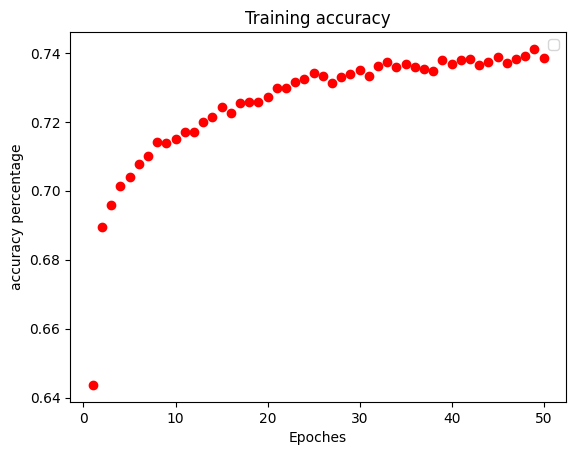

In [149]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro')
plt.title('Training accuracy')
plt.legend()
plt.xlabel('Epoches')
plt.ylabel('accuracy percentage')

plt.show()

In [150]:
from keras.models import load_model
model = load_model("model1_with_dropoutandrecurr0.5.h5")
predictions = model.predict(data[454:455])

1/1 [==============================] - 0s 143ms/step


In [151]:
predictions

array([[0.48796996]], dtype=float32)